In [1]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.utils import shuffle
from skimage import io, util
import tensorflow as tf
from tensorflow import keras
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [2]:
# define the image path
img_train_folder=r'dataset\pictures\train\128x128'
#img_test_folder_treated=r'dataset\pictures\test\128x128\treated'
img_test_folder_non_treated=r'dataset\pictures\test\128x128\non-treated'

In [3]:
 # random seed, but fixed
np.random.seed(42)

In [4]:
######################################################
# auxiliary code to visualize all pictures of dataset
######################################################
plt.figure(figsize=(50,50))
j = 0

for dir1 in os.listdir(img_train_folder):
    for file in os.listdir(os.path.join(img_train_folder, dir1)):
        image_path= os.path.join(img_train_folder, dir1)
        image_path2= os.path.join(image_path, file)    
        img=mpimg.imread(image_path2)
        ax=plt.subplot(40,40,j+1)
        ax.title.set_text(file)
        plt.imshow(img)
        j+=1
######################################################

In [4]:
# function to gather pictures and generate a numpy array
def create_dataset(img_folder):
   
    img_data_array = []
    class_name = []
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path = os.path.join(img_folder, dir1, file)
            image = io.imread(image_path, as_gray=True)
            image = util.invert(image)
            image = np.array(image)
            image /= 255
            image = image.astype('float32')
            img_data_array.append(image)
            class_name.append(int(dir1))
    return img_data_array, class_name

In [5]:
# dataset import
X_array1, y_array1 = create_dataset(img_train_folder)
#X_array2, y_array2 = create_dataset(img_test_folder_non_treated)
#X_array2, y_array2 = create_dataset(img_test_folder_treated)

X_train = np.array(X_array1)
y_train = np.array(y_array1)
#X_test = np.array(X_array2)
#y_test = np.array(y_array2)

X_train, y_train = shuffle(X_train, y_train)
#X_test, y_test = shuffle(X_test, y_test)

print('treinamento completo:', X_train.shape)
#print('testes:              ', X_test.shape)

treinamento completo: (1522, 128, 128)


In [6]:
# separação dos dados de treinamento e validação
X_test, X_valid, X_train = X_train[:100], X_train[100:200], X_train[200:]
y_test, y_valid, y_train = y_train[:100], y_train[100:200], y_train[200:]
print('teste:', X_test.shape)
print('treinamento:', X_train.shape)
print('validação:   ', X_valid.shape)

teste: (100, 128, 128)
treinamento: (1322, 128, 128)
validação:    (100, 128, 128)


In [7]:
# enumerate the classes found
class_names = ['cpu', 'gpu', 'mobo', 'ram', 'hd', 'ssd-sata', 'ssd-m2']

In [ ]:
# visualização do dataset de treino
plt.figure(figsize=(40, 40))
for index, image in enumerate(X_train):
    plt.subplot(37, 37, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

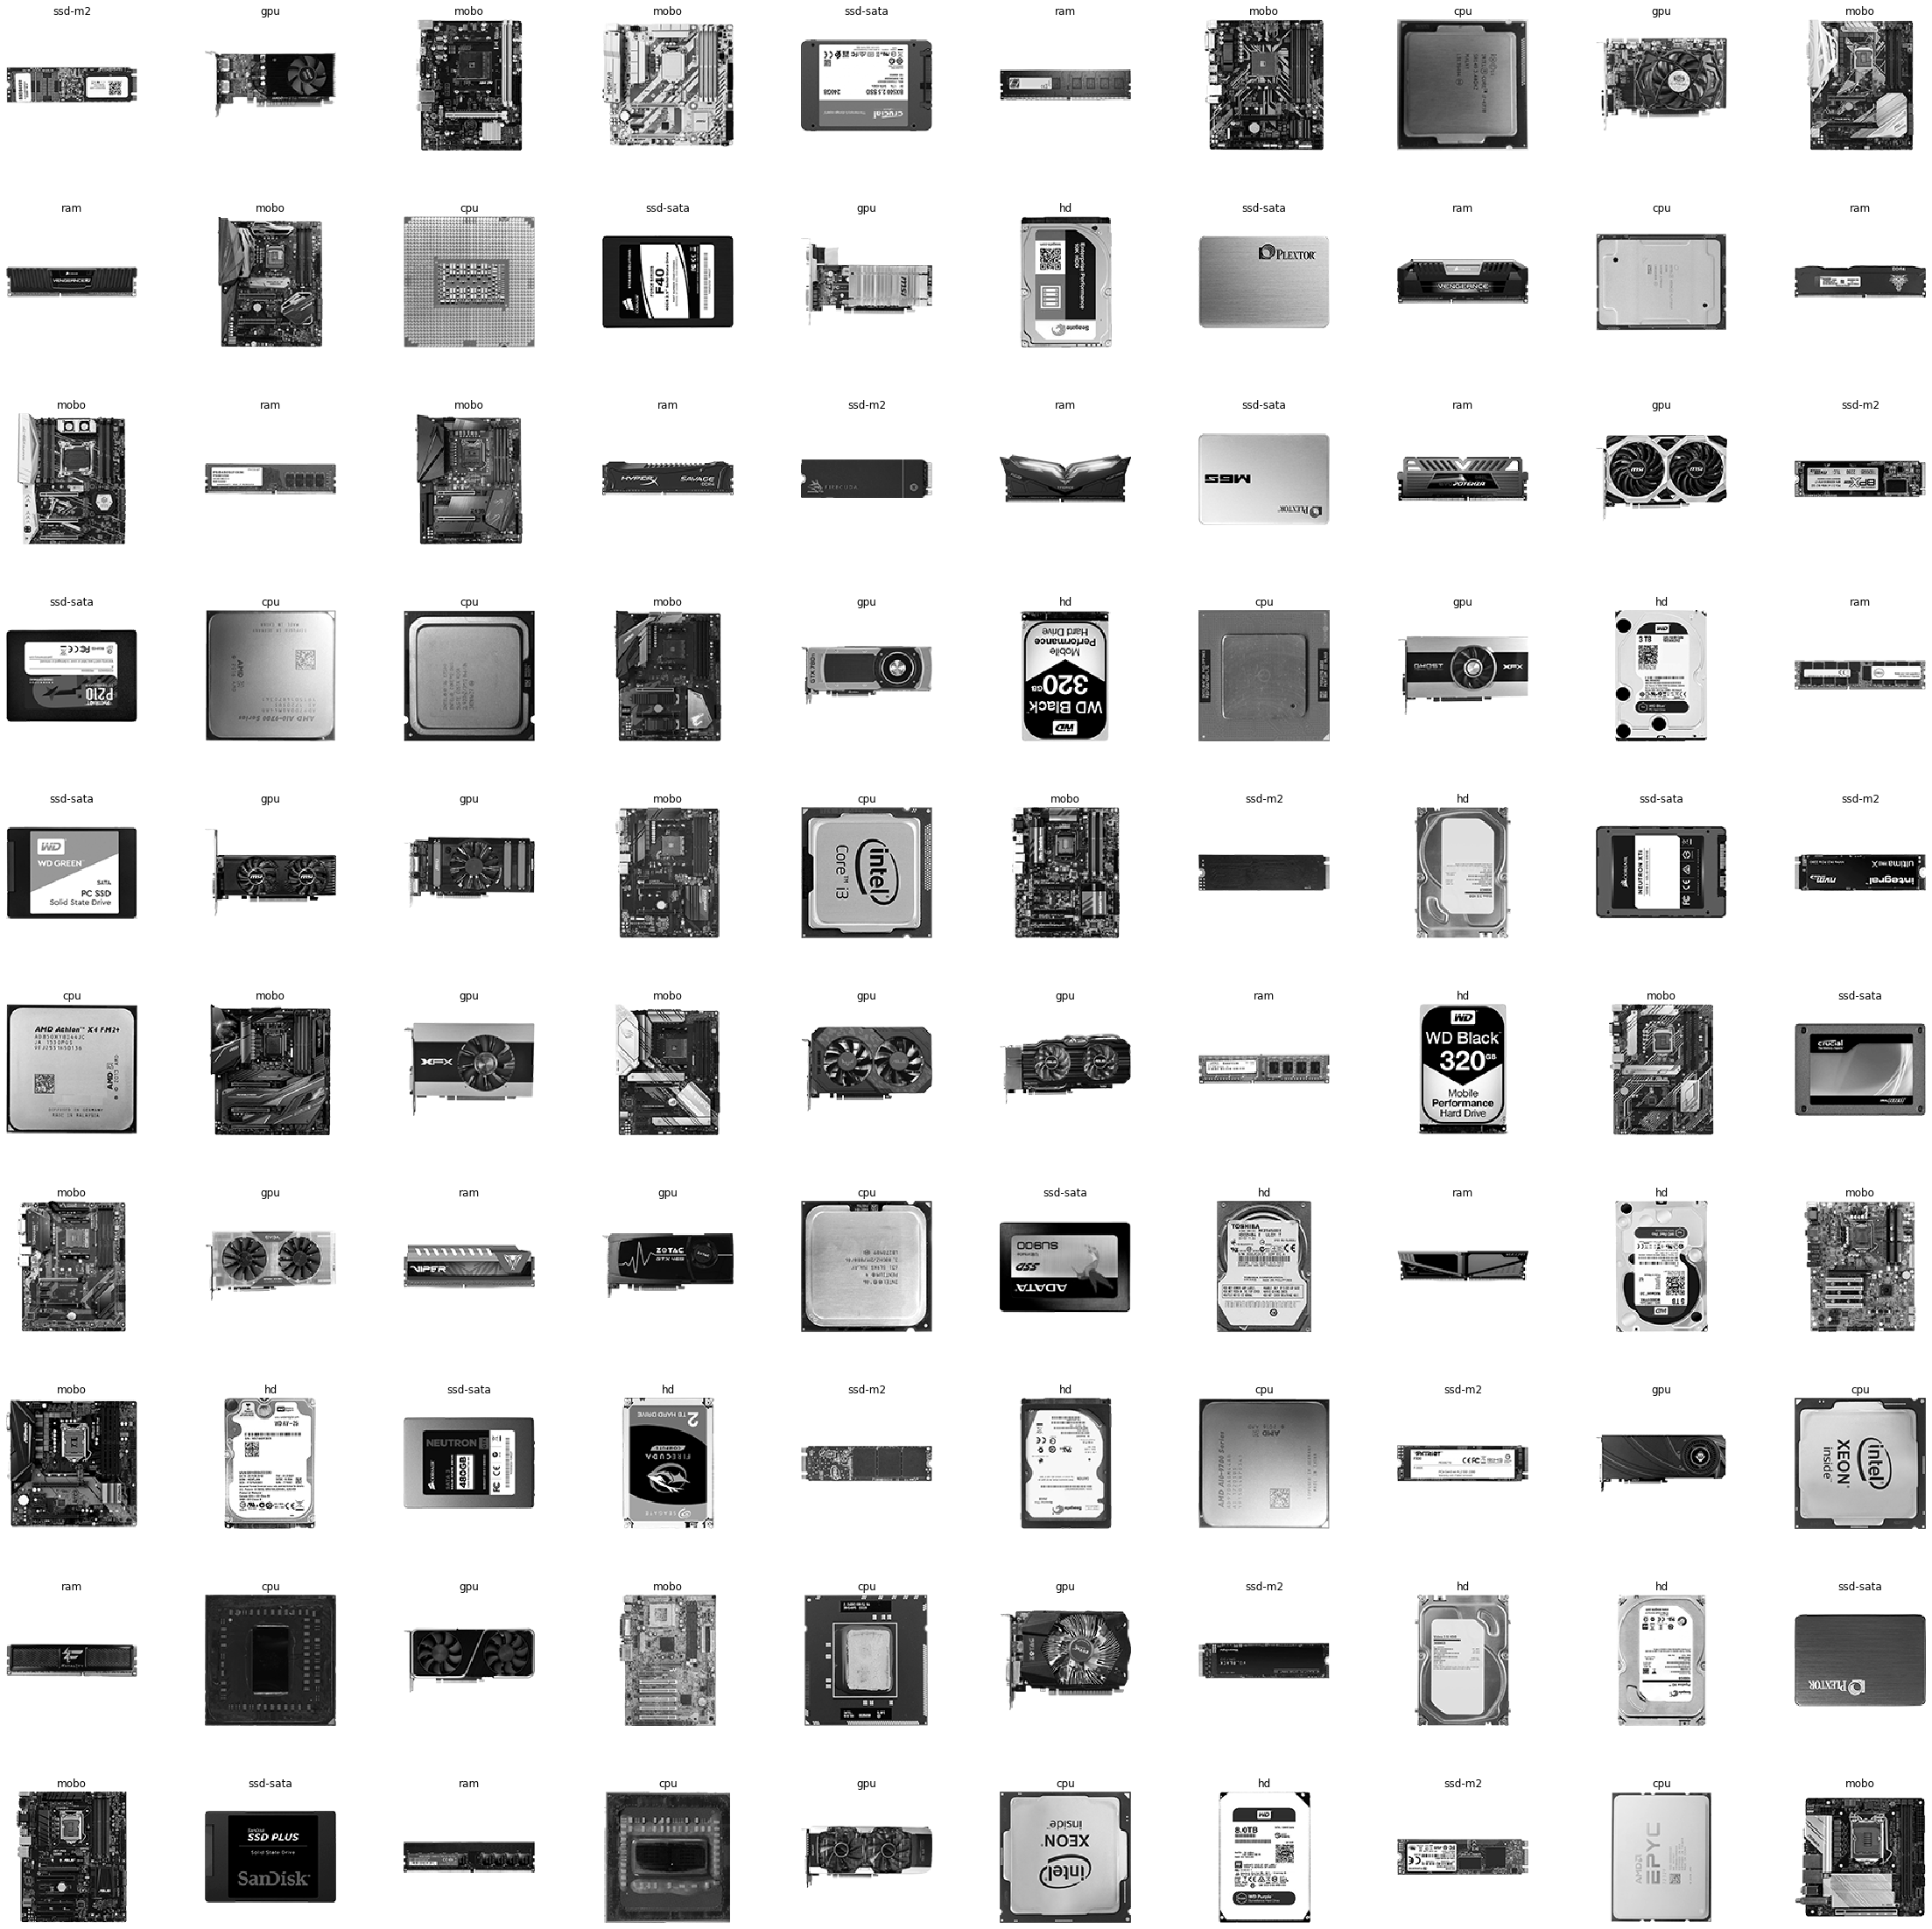

In [8]:
# visualização do dataset de validação
plt.figure(figsize=(40, 40))
for index, image in enumerate(X_valid):
    plt.subplot(10, 10, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_valid[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

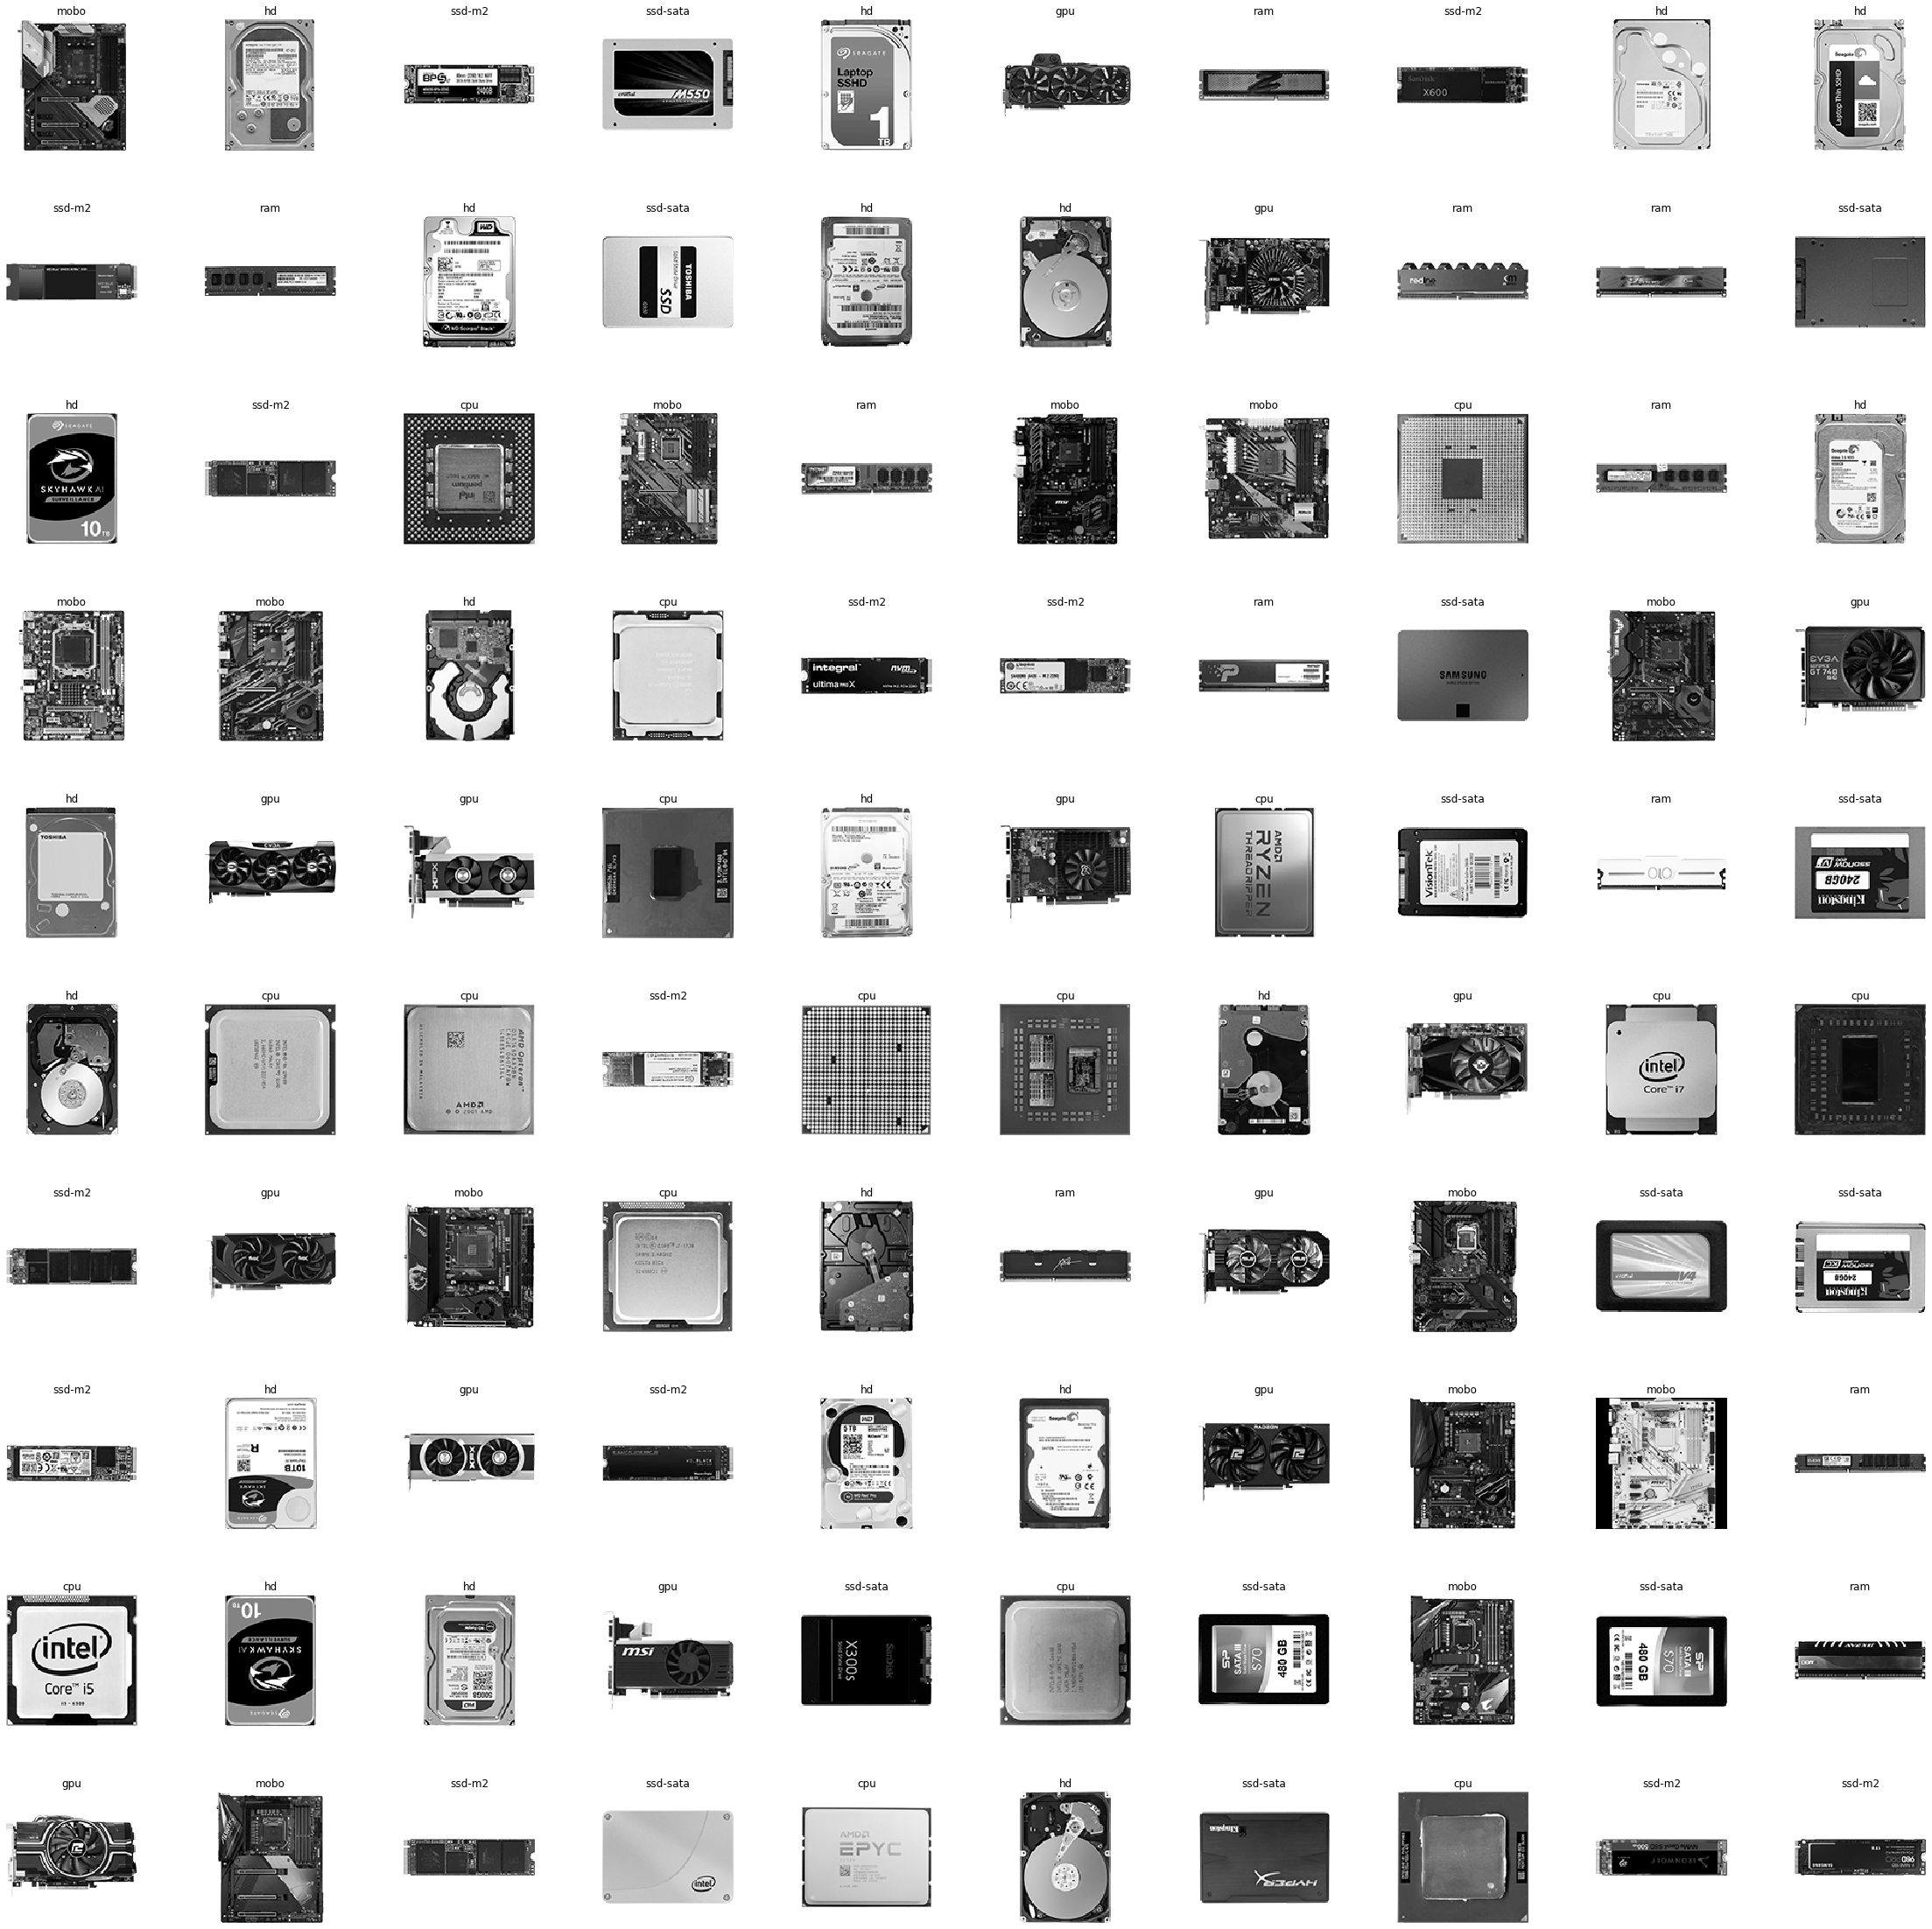

In [9]:
# visualização do dataset de teste
plt.figure(figsize=(40, 40))
for index, image in enumerate(X_test):
    plt.subplot(10, 10, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

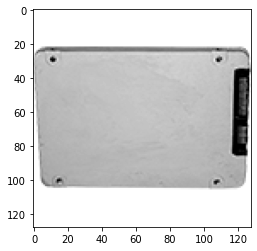

In [10]:
# visualização da primeira instância de treino
plt.imshow(X_train[0], cmap='binary')
plt.show()

In [ ]:
###################################################################
# auxiliary code to visualize the array generated from the pictures
###################################################################
#np.set_printoptions(threshold=sys.maxsize)
print(X_train[0])
###################################################################

In [12]:
###################################################################
# auxiliary code to visualize the label of the picture
###################################################################
#np.set_printoptions(threshold=sys.maxsize)
print(y_train[0])
###################################################################

5


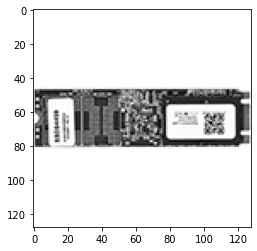

In [13]:
# visualização da primeira instância de validação
plt.imshow(X_valid[0], cmap='binary')
plt.show()

In [ ]:
###################################################################
# auxiliary code to visualize the array generated from the pictures
###################################################################
#np.set_printoptions(threshold=sys.maxsize)
print(X_valid[0])
###################################################################

In [14]:
###################################################################
# auxiliary code to visualize the label of the picture
###################################################################
#np.set_printoptions(threshold=sys.maxsize)
print(y_valid[0])
###################################################################

6


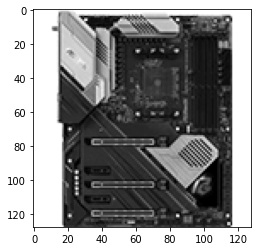

In [15]:
# visualização da primeira instância de teste
plt.imshow(X_test[0], cmap='binary')
plt.show()

In [ ]:
###################################################################
# auxiliary code to visualize the array generated from the pictures
###################################################################
#np.set_printoptions(threshold=sys.maxsize)
print(X_test[0])
###################################################################

In [16]:
###################################################################
# auxiliary code to visualize the label of the picture
###################################################################
#np.set_printoptions(threshold=sys.maxsize)
print(y_test[0])
###################################################################

2


In [17]:
class_names[y_train[0]]

'ssd-sata'

In [18]:
class_names[y_valid[0]]

'ssd-m2'

In [19]:
class_names[y_test[0]]

'mobo'

In [47]:
# build the neural network layers
keras.backend.clear_session() # clears the session
tf.random.set_seed(42) # random seed, but fixed

model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[128, 128]),
            keras.layers.Dense(5000, activation='relu'),
            keras.layers.Dense(500, activation='relu'),
            keras.layers.Dense(50, activation='relu'),            
            keras.layers.Dense(7, activation='softmax')
        ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 5000)              81925000  
                                                                 
 dense_1 (Dense)             (None, 500)               2500500   
                                                                 
 dense_2 (Dense)             (None, 50)                25050     
                                                                 
 dense_3 (Dense)             (None, 7)                 357       
                                                                 
Total params: 84,450,907
Trainable params: 84,450,907
Non-trainable params: 0
_________________________________________________________________


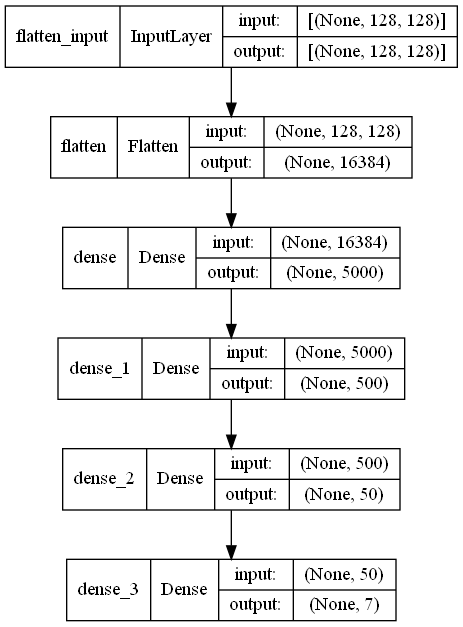

In [48]:
tf.keras.utils.plot_model(model, 'pc_hardware_model.png', show_shapes=True)

In [49]:
# primeira camada e respectivo nome
hidden1 = model.layers[1]
hidden1.name

# obtém pesos e vieses da camada
weights, biases = hidden1.get_weights()
print('weights:', weights.shape)
print('biases: ', biases.shape)

weights: (16384, 5000)
biases:  (5000,)


In [50]:
weights

array([[ 0.00551304, -0.00197635, -0.00492862, ..., -0.00772864,
         0.00347892, -0.01013907],
       [ 0.01489929,  0.00183041, -0.0136001 , ..., -0.00730365,
        -0.01655377,  0.01322168],
       [-0.00229354, -0.00970868,  0.01052965, ...,  0.01389362,
         0.01334109, -0.00182773],
       ...,
       [ 0.0095079 , -0.00040664,  0.00470622, ...,  0.01418147,
         0.00897453,  0.01666273],
       [-0.01104296, -0.01012582, -0.0126989 , ..., -0.00172839,
        -0.01645185,  0.012169  ],
       [-0.00618808,  0.01195743,  0.00419915, ...,  0.01467841,
         0.00449872,  0.00058373]], dtype=float32)

In [51]:
biases

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [52]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [53]:
# esta chamada pode demorar um pouco
%time history = model.fit(X_train, y_train, epochs=500, validation_data=(X_valid, y_valid))

Epoch 1/500
42/42 [==============================] - 10s 222ms/step - loss: 1.9402 - accuracy: 0.2042 - val_loss: 1.9354 - val_accuracy: 0.3400
Epoch 2/500
42/42 [==============================] - 9s 218ms/step - loss: 1.9312 - accuracy: 0.2806 - val_loss: 1.9278 - val_accuracy: 0.3200
Epoch 3/500
42/42 [==============================] - 9s 214ms/step - loss: 1.9241 - accuracy: 0.2912 - val_loss: 1.9219 - val_accuracy: 0.2900
Epoch 4/500
42/42 [==============================] - 9s 214ms/step - loss: 1.9182 - accuracy: 0.2617 - val_loss: 1.9171 - val_accuracy: 0.2800
Epoch 5/500
42/42 [==============================] - 9s 213ms/step - loss: 1.9134 - accuracy: 0.2678 - val_loss: 1.9135 - val_accuracy: 0.2500
Epoch 6/500
42/42 [==============================] - 9s 214ms/step - loss: 1.9091 - accuracy: 0.1846 - val_loss: 1.9103 - val_accuracy: 0.3300
Epoch 7/500
42/42 [==============================] - 9s 213ms/step - loss: 1.9057 - accuracy: 0.2829 - val_loss: 1.9063 - val_accuracy: 0.300

In [54]:
# os dados do treinamento estão disponíveis no histórico retornado
print('parâmetros:', history.params)
print('métricas:  ', list(history.history.keys()))
print('épocas:    ', history.epoch)

parâmetros: {'verbose': 1, 'epochs': 500, 'steps': 42}
métricas:   ['loss', 'accuracy', 'val_loss', 'val_accuracy']
épocas:     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 1

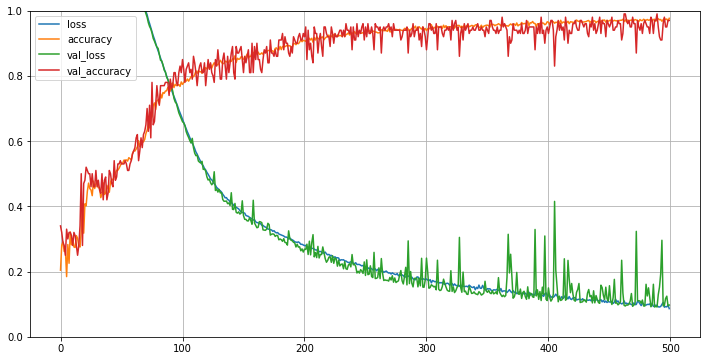

In [55]:
pd.DataFrame(history.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [56]:
# avaliação com conjunto de teste
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 58ms/step - loss: 0.1746 - accuracy: 0.9700


[0.17455586791038513, 0.9700000286102295]

In [57]:
# probabilidades computadas para três instâncias de teste
X_new = X_test[:100]
y_proba = model.predict(X_new)
print(y_proba.round(2))

[[0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.42 0.   0.   0.57]
 [0.01 0.74 0.   0.   0.   0.25 0.  ]
 [0.15 0.   0.   0.   0.85 0.   0.  ]
 [0.   0.5  0.   0.5  0.   0.   0.  ]
 [0.   0.   0.   0.98 0.   0.   0.02]
 [0.   0.   0.   0.01 0.   0.   0.99]
 [0.16 0.   0.   0.   0.84 0.   0.  ]
 [0.01 0.   0.   0.   0.99 0.   0.  ]
 [0.   0.   0.   0.02 0.   0.   0.98]
 [0.   0.   0.   0.97 0.   0.   0.03]
 [0.01 0.   0.   0.   0.99 0.   0.  ]
 [0.24 0.02 0.   0.   0.   0.74 0.  ]
 [0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.01 0.  ]
 [0.   0.01 0.   0.75 0.   0.   0.24]
 [0.   0.   0.   0.98 0.01 0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.03 0.   0.97 0.   0.  ]
 [0.   0.   0.   0.03 0.   0.   0.97]
 [1.   0.   0.   0.   0.   0.   0.  ]
 [0.03 0.   0.85 0.   0.11 0.   0.  ]
 [0.   0.   0.   0.98 0.   0.   0.01]
 [0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   

In [58]:
# classes previstas e reais para as mesmas três instâncias de teste
y_pred = np.argmax(model.predict(X_new), axis=-1)
print('previstas: ', np.array(class_names)[y_pred])
print('reais:     ', np.array(class_names)[y_test[:100]])

previstas:  ['mobo' 'hd' 'ssd-m2' 'gpu' 'hd' 'gpu' 'ram' 'ssd-m2' 'hd' 'hd' 'ssd-m2'
 'ram' 'hd' 'ssd-sata' 'hd' 'hd' 'gpu' 'ram' 'ram' 'ssd-sata' 'hd'
 'ssd-m2' 'cpu' 'mobo' 'ram' 'mobo' 'mobo' 'cpu' 'ram' 'hd' 'mobo' 'mobo'
 'hd' 'cpu' 'ssd-m2' 'ssd-m2' 'ram' 'ssd-sata' 'mobo' 'gpu' 'hd' 'gpu'
 'gpu' 'cpu' 'hd' 'gpu' 'cpu' 'ssd-sata' 'ram' 'ssd-sata' 'hd' 'cpu' 'cpu'
 'ssd-m2' 'cpu' 'cpu' 'hd' 'gpu' 'cpu' 'cpu' 'ssd-m2' 'gpu' 'mobo' 'cpu'
 'hd' 'ram' 'gpu' 'mobo' 'ssd-sata' 'ssd-sata' 'ssd-m2' 'hd' 'gpu'
 'ssd-m2' 'hd' 'hd' 'gpu' 'mobo' 'cpu' 'ram' 'cpu' 'hd' 'hd' 'gpu'
 'ssd-sata' 'cpu' 'ssd-sata' 'mobo' 'ssd-sata' 'ssd-m2' 'gpu' 'mobo'
 'ssd-m2' 'ssd-sata' 'cpu' 'hd' 'ssd-sata' 'cpu' 'ssd-m2' 'ssd-m2']
reais:      ['mobo' 'hd' 'ssd-m2' 'ssd-sata' 'hd' 'gpu' 'ram' 'ssd-m2' 'hd' 'hd'
 'ssd-m2' 'ram' 'hd' 'ssd-sata' 'hd' 'hd' 'gpu' 'ram' 'ram' 'ssd-sata'
 'hd' 'ssd-m2' 'cpu' 'mobo' 'ram' 'mobo' 'mobo' 'cpu' 'ram' 'hd' 'mobo'
 'mobo' 'hd' 'cpu' 'ssd-m2' 'ssd-m2' 'ram' 'ssd-sata' 'mobo'

In [1]:
# visualização das tres instâncias
plt.figure(figsize=(40, 40))
for index, image in enumerate(X_new):
    plt.subplot(10, 10, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

NameError: name 'plt' is not defined